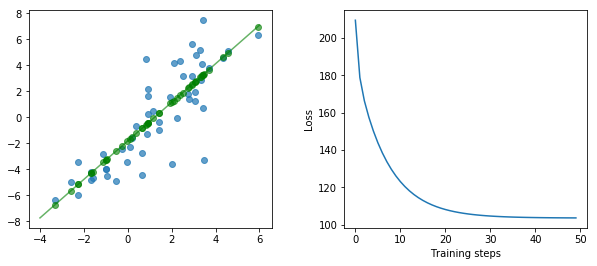

In [1]:
#@test {"output": "ignore"}
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Set up the data with a noisy linear relationship between X and Y.
num_examples = 50
X = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
X += np.random.randn(2, num_examples)
x, y = X
bias_with_x = np.array([(1., a) for a in x]).astype(np.float32)

losses = []
training_steps = 50
learning_rate = 0.002

with tf.Session() as sess:
    # Set up all the tensors, variables, and operations.
    input = tf.constant(bias_with_x)
    target = tf.constant(np.transpose([y]).astype(np.float32))
    weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))

    tf.global_variables_initializer().run()

    yhat = tf.matmul(input, weights)
    yerror = tf.subtract(yhat, target)
    loss = tf.nn.l2_loss(yerror)
  
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
    for _ in range(training_steps):
        # Repeatedly run the operations, updating the TensorFlow variable.
        update_weights.run()
        losses.append(loss.eval())

    # Training is done, get the final values for the graphs
    betas = weights.eval()
    yhat = yhat.eval()

# Show the fit and the loss over time.
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7)
ax1.scatter(x, np.transpose(yhat)[0], c="g", alpha=.6)
line_x_range = (-4, 6)
ax1.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6)
ax2.plot(range(0, training_steps), losses)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Training steps")
plt.show()